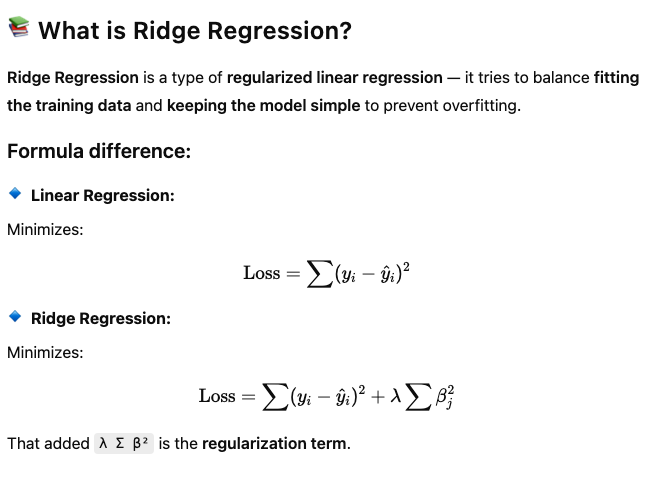

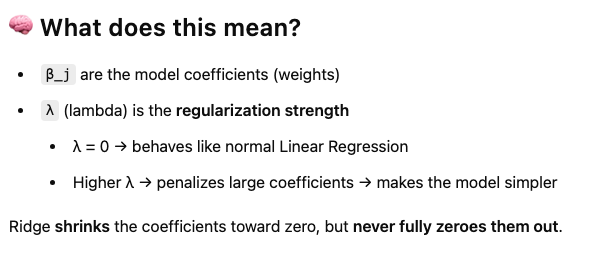

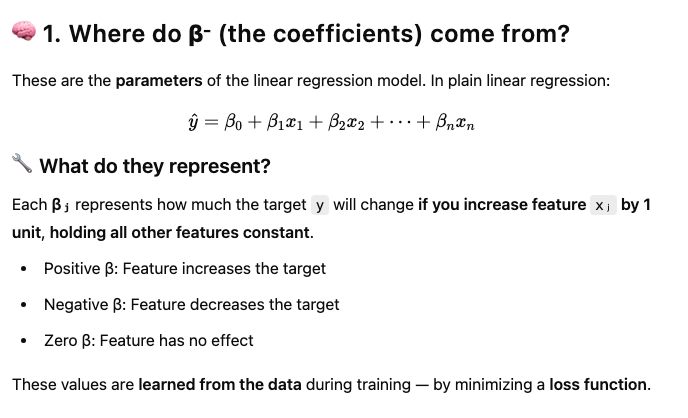

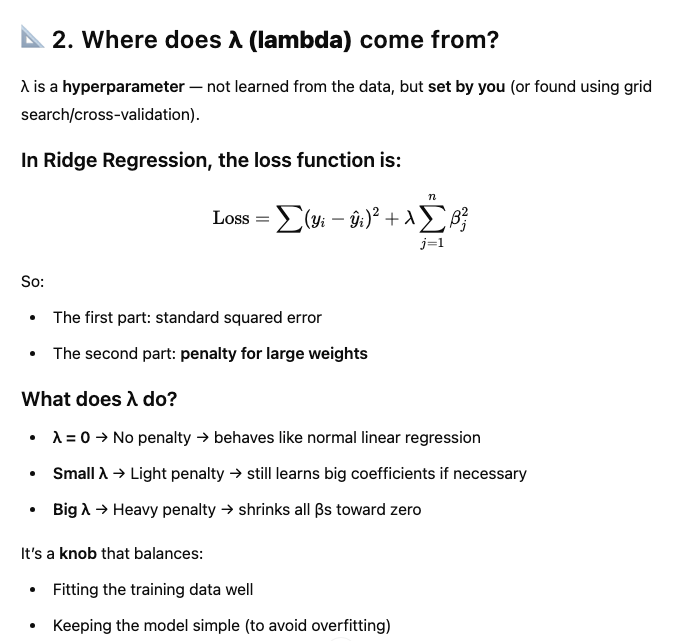

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df=pd.read_csv(url)
print(df)

      MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0 

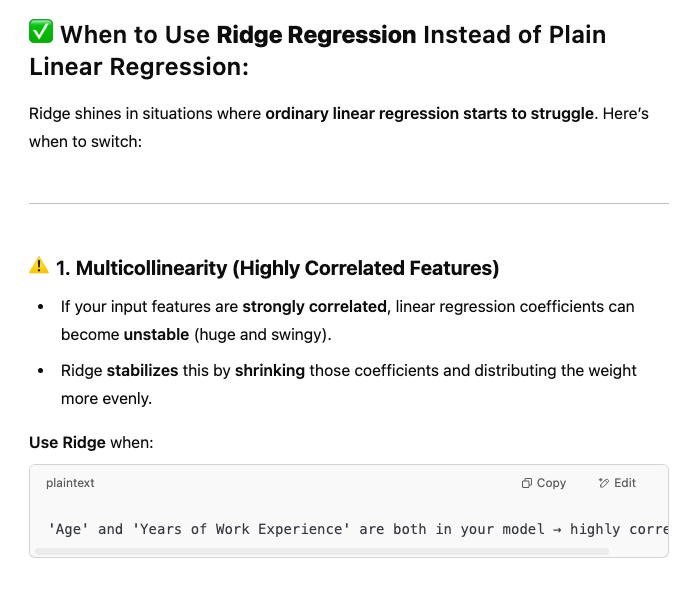

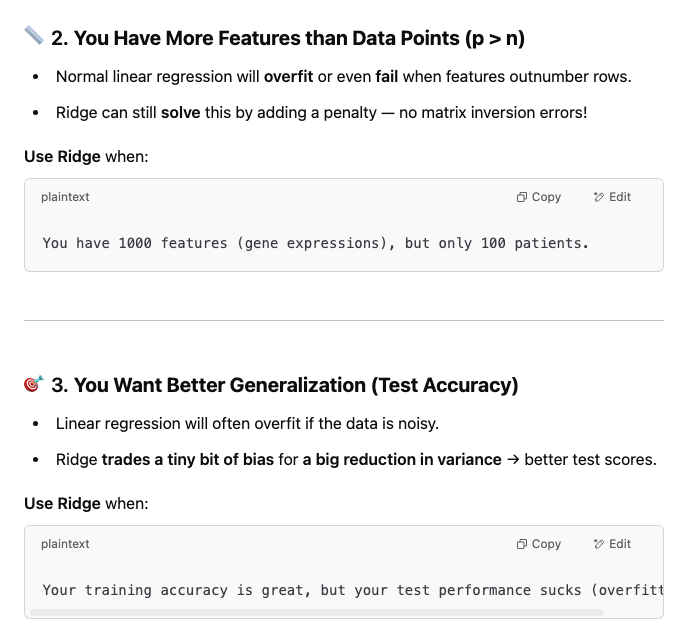

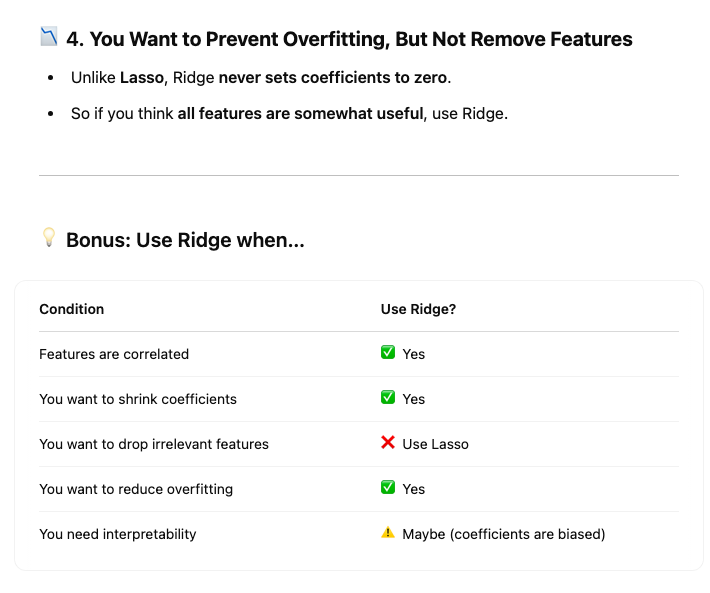

In [10]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df[['MODELYEAR', 'ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']]
y = df["CO2EMISSIONS"]


# Sample data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Always scale for Ridge!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression with alpha=1.0
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

print("R² score:", ridge.score(X_test_scaled, y_test))
print("Coefficients:", ridge.coef_)

R² score: 0.8522087720616086
Coefficients: [ 0.         14.41954859 14.78413495 33.27789775]


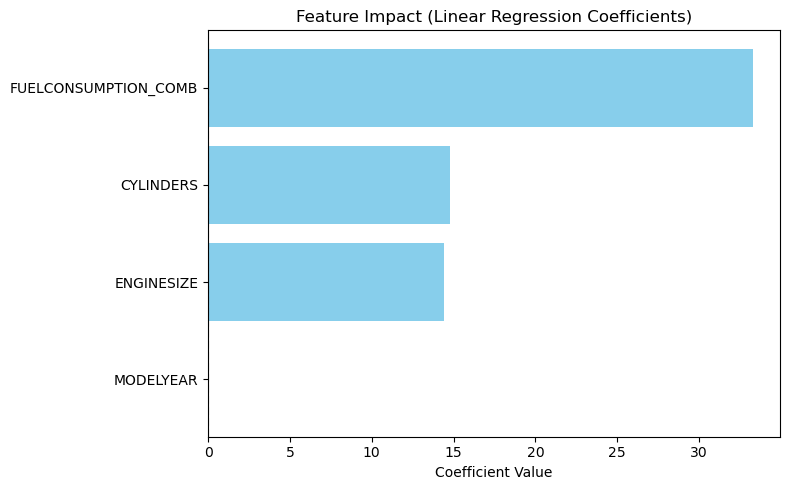

In [12]:
coefficients = ridge.coef_
features = X.columns


coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=True)


plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Feature Impact (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()